<a href="https://colab.research.google.com/github/srinivasanibmbangalore/AnalyticsVidhyaCourseOnDL/blob/master/Image_Augmentation_Basics_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import argparse
import os
import shutil
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from psutil import virtual_memory

from keras import backend as K 
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation,InputLayer, Conv2D, MaxPool2D, Flatten
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.layers import GlobalMaxPool2D
from keras.preprocessing.image import ImageDataGenerator

In [44]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/ml_data/avidhya/image_augmentation'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [45]:
pwd='4/2gHNS5FHQivG2U0hZOMrHxGMOLFHEn_G2udPOMpEI8l9hN8iCYDiLoE'


/content/gdrive/My Drive/ml_data/avidhya/manvswoman/images/005/9257.jpg


(399, 640, 3)

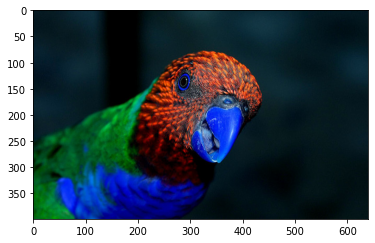

In [47]:
imgLoc=root_path+'/bird.jpg'
print(trialImgLoc)
img=cv2.imread(imgLoc)
plt.imshow(img)
img.shape

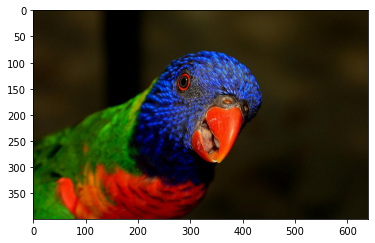

In [48]:
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

### Image Augmentations
##### Rotation
##### Width Shift Range
##### shear range
##### Horizontal Flip

In [49]:
im_rgb.shape

(399, 640, 3)

In [50]:
### Rotation Image Augmentations
datagen = ImageDataGenerator(rotation_range=60)

In [51]:
## Batch Size has to be specified for Image Augmentation. Since here it is being only done for 1 image
## image also has to be re-sized
im_rgb=im_rgb.reshape((1,)+im_rgb.shape) # 1 is the batch size
im_rgb.shape


(1, 399, 640, 3)

Once an Image Data Generator has been constructed, an iterator can be created for an image dataset.

The iterator will return one batch of augmented images for each iteration.

An iterator can be created from an image dataset loaded in memory via the flow() function; for example:

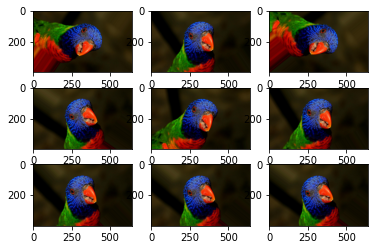

In [54]:
it = datagen.flow(im_rgb, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()


Horizontal and Vertical Shift Augmentation
A shift to an image means moving all pixels of the image in one direction, such as horizontally or vertically, while keeping the image dimensions the same.

This means that some of the pixels will be clipped off the image and there will be a region of the image where new pixel values will have to be specified.

The width_shift_range and height_shift_range arguments to the ImageDataGenerator constructor control the amount of horizontal and vertical shift respectively.

These arguments can specify a floating point value that indicates the percentage (between 0 and 1) of the width or height of the image to shift. Alternately, a number of pixels can be specified to shift the image.

Specifically, a value in the range between no shift and the percentage or pixel value will be sampled for each image and the shift performed, e.g. [0, value]. Alternately, you can specify a tuple or array of the min and max range from which the shift will be sampled; for example: [-100, 100] or [-0.5, 0.5].

The example below demonstrates a horizontal shift with the width_shift_range argument between [-200,200] pixels and generates a plot of generated images to demonstrate the effect.

We can see in the plot of the result that a range of different randomly selected positive and negative horizontal shifts was performed and the pixel values at the edge of the image are duplicated to fill in the empty part of the image created by the shift.

In [56]:
### Horizontal Shift Augmentations
datagen = ImageDataGenerator(width_shift_range=[-200,200])

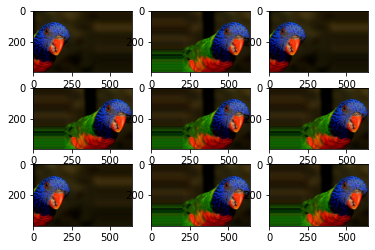

In [57]:
it = datagen.flow(im_rgb, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

vertical shifts of the image via the height_shift_range argument, in this case specifying the percentage of the image to shift as 0.5 the height of the image.

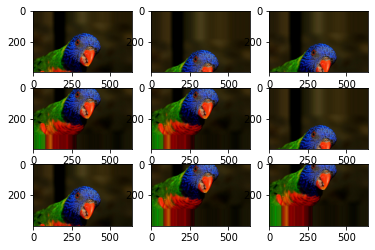

In [58]:
### Vertical Shift Augmentations
datagen = ImageDataGenerator(height_shift_range=0.5)
it = datagen.flow(im_rgb, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

An image flip means reversing the rows or columns of pixels in the case of a vertical or horizontal flip respectively.

The flip augmentation is specified by a boolean horizontal_flip or vertical_flip argument to the ImageDataGenerator class constructor. For photographs like the bird photograph used in this tutorial, horizontal flips may make sense, but vertical flips would not.

For other types of images, such as aerial photographs, cosmology photographs, and microscopic photographs, perhaps vertical flips make sense.

The example below demonstrates augmenting the chosen photograph with horizontal flips via the horizontal_flip argument.

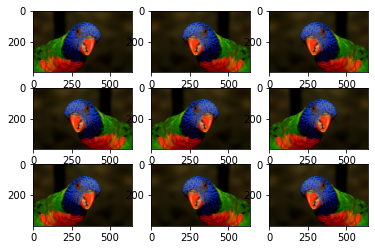

In [82]:
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(im_rgb, batch_size=1)
# generate samples and plot
for i in range(0,9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

Random Brightness Augmentation
The brightness of the image can be augmented by either randomly darkening images, brightening images, or both.

The intent is to allow a model to generalize across images trained on different lighting levels.

This can be achieved by specifying the brightness_range argument to the ImageDataGenerator() constructor that specifies min and max range as a float representing a percentage for selecting a brightening amount.

Values less than 1.0 darken the image, e.g. [0.5, 1.0], whereas values larger than 1.0 brighten the image, e.g. [1.0, 1.5], where 1.0 has no effect on brightness.

The example below demonstrates a brightness image augmentation, allowing the generator to randomly darken the image between 1.0 (no change) and 0.2 or 20%.

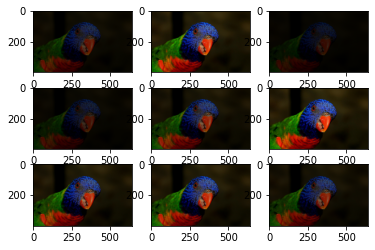

In [83]:
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
it = datagen.flow(im_rgb, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()